<a href="https://colab.research.google.com/github/YBilodeau/Sales-Predictions/blob/main/Sales_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sales Prediction Project**
- Yvon Bilodeau

The project is a sales prediction for food items sold at various stores. The goal of this is to help the retailer better understand the properties of products and outlets that play crucial roles in increasing sales.

**Data Dictionary for this dataset**


|**Variable Name**|	**Description**|
| ----- | ----- |
|Item_Identifier|	Unique product ID|
|Item_Weight|	Weight of product|
|Item_Fat_Content|	Whether the product is low fat or regular|
|Item_Visibility|	The percentage of total display area of all products in a store allocated to the particular product|
|Item_Type|	The category to which the product belongs|
|Item_MRP|	Maximum Retail Price (list price) of the product|
|Outlet_Identifier|	Unique store ID|
|Outlet_Establishment_Year|	The year in which store was established|
|Outlet_Size|	The size of the store in terms of ground area covered|
|Outlet_Location_Type|	The type of area in which the store is located|
|Outlet_Type|	Whether the outlet is a grocery store or some sort of supermarket|
|Item_Outlet_Sales|	Sales of the product in the particular store. This is the target variable to be predicted.|

## **Mount Data | Import Libraries | Load the Dataset**

### **Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Load the Dataset**

- Data downloaded from [link](https://drive.google.com/file/d/1syH81TVrbBsdymLT_jl2JIf6IjPXtSQw/view). This was the [Original data source](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/).

In [3]:
filename = "/content/drive/MyDrive/Colab Notebooks/CodingDojo/000 Data Files/sales_predictions.csv"
df = pd.read_csv(filename)

## **Inspect the Data**

### Display Rows and Column Count

In [4]:
df.shape

(8523, 12)

### Display Data Types

In [5]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### Display Column Name, Count of Non-Null Values, and Datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### View First (5) Rows

In [7]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- Data appears to have loaded correctly.

## **Clean the Data**

### **Remove Duplicates**

In [8]:
df.duplicated().sum()

0

In [9]:
df.drop_duplicates(keep='first', inplace=True)
df.shape

(8523, 12)

In [10]:
df.duplicated().sum()

0

- No duplicates were dropped.

### **Missing Values**

In [11]:
print(df.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


- 'Item_Weight' and 'Outlet Size' column/indexes have missing values.

#### 'Item Weight' column


- 'Item_Weight' has 1643 missing values. All identical 'Item_Identifier's should have the same 'Item_Weight'.

In [12]:
# Loop through index values of the dataframe
for ind in df.index:
    # Create a filter to select the Item_Identifier corresponding to the index
    item_filter = df['Item_Identifier'] == df.loc[ind,'Item_Identifier']

    # Calculate the rounded value of the mean 'Item_Weight' of this rows 'Item_Identifier' 
    mean_item_weight = round(df.loc[item_filter,'Item_Weight'].mean(), 3)

    # Assign mean_item_weight to the 'Item_Weight' column of this row
    df.loc[ind,'Item_Weight'] = mean_item_weight
    
    #print(ind, df['Item_Identifier'][ind], df['Item_Weight'][ind], item_weight, "\n")

In [13]:
# Identify any remaining 'Item_Identifier's without 'Item_Weight'
print(df.Item_Weight.isnull().sum())
df[df.Item_Weight.isnull()]

4


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


- Drop (4) remaining rows with missing 'Item_Weight' values.

In [14]:
df.dropna(subset=['Item_Weight'],inplace=True)

- Confirm there are no 'Item_Identifier's without 'Item_Weight's

In [15]:
print(df.Item_Weight.isnull().sum())
df[df.Item_Weight.isnull()]

0


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


#### 'Outlet_Size' column

'Item_Size' has 2410 missing values.

In [16]:
print(df['Outlet_Size'].unique())

['Medium' nan 'High' 'Small']


In [17]:
df.groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Size'].unique()

Outlet_Type        Outlet_Location_Type
Grocery Store      Tier 1                          [Small]
                   Tier 3                            [nan]
Supermarket Type1  Tier 1                  [Medium, Small]
                   Tier 2                     [nan, Small]
                   Tier 3                           [High]
Supermarket Type2  Tier 3                         [Medium]
Supermarket Type3  Tier 3                         [Medium]
Name: Outlet_Size, dtype: object

- Unable to impute 'Outlet_Size' based upon 'Outlet_Type' and/or 'Outlet_Location_Type'.
- Fill missing values with 'Unknown' value.
- 2410 missing values out of 8523 rows is significant (28%). May need to consider dropping this column upon further evaluation.

In [18]:
df.Outlet_Size.fillna('Unknown',inplace=True)

In [19]:
df.groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Size'].unique()

Outlet_Type        Outlet_Location_Type
Grocery Store      Tier 1                           [Small]
                   Tier 3                         [Unknown]
Supermarket Type1  Tier 1                   [Medium, Small]
                   Tier 2                  [Unknown, Small]
                   Tier 3                            [High]
Supermarket Type2  Tier 3                          [Medium]
Supermarket Type3  Tier 3                          [Medium]
Name: Outlet_Size, dtype: object

### **Inspect Columns with Object Datatypes**

Check for common syntax errors which may include extra white spaces at the beginning or end of strings or column names.

Check for typos or inconsistencies in strings that need to be fixed.

#### 'Item_Fat_Content' column

In [20]:
print(df['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


- Replace 'low fat' and 'LF' with 'Low Fat'.
- Replace 'reg' with 'Regular'.

In [21]:
# Define a dictionary with key/value pairs and use it to replace values
dict = {"low fat": 'Low Fat', "reg": 'Regular', "LF": 'Low Fat'}
df.replace({'Item_Fat_Content': dict}, inplace = True)

In [22]:
print(df['Item_Fat_Content'].unique())

['Low Fat' 'Regular']


- Replacement values confirmed.

#### 'Item_Type' column

In [23]:
df.groupby(['Item_Type'])['Item_Type'].count()

Item_Type
Baking Goods              647
Breads                    251
Breakfast                 110
Canned                    649
Dairy                     681
Frozen Foods              855
Fruits and Vegetables    1232
Hard Drinks               214
Health and Hygiene        520
Household                 910
Meat                      425
Others                    169
Seafood                    64
Snack Foods              1199
Soft Drinks               445
Starchy Foods             148
Name: Item_Type, dtype: int64

- No issues noted.

#### 'Outlet_Identifier' column

In [24]:
print(df['Outlet_Identifier'].unique())

['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


- No issues noted.

#### 'Outlet_Establishment_Year' column

In [25]:
print(df['Outlet_Establishment_Year'].unique())

[1999 2009 1998 1987 1985 2002 2007 1997 2004]


- No issues noted.  
- We could update the datatype to int64 but not deemed necessary at this time.

####'Outlet_Size' column

In [26]:
print(df['Outlet_Size'].unique())

['Medium' 'Unknown' 'High' 'Small']


- No issues noted.

#### 'Outlet_Location_Type' column

In [27]:
print(df['Outlet_Location_Type'].unique())

['Tier 1' 'Tier 3' 'Tier 2']


- No issues noted.

####'Outlet_Type' column

In [28]:
print(df['Outlet_Type'].unique())

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


- No issues noted.

### **Inspect Columns with Numerical Datatypes**

In [29]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- Filter columns with numerical indexes.

In [30]:
# Create a series of the datatypes
data_types = df.dtypes
# Create a filter to select only the numerical datatypes
numerical_data_types = data_types[(data_types == "float64") | (data_types == "int64")]
# Display the series of numerical datatypes
numerical_data_types

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

- Check for Outliers within the numerical datatypes

In [31]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,0.066112,141.010019,1997.837892,2181.188779
std,4.646098,0.051586,62.283594,8.369105,1706.511093
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026983,93.844900,1987.000000,834.247400
50%,12.650000,0.053925,143.047000,1999.000000,1794.331000
75%,16.850000,0.094558,185.676600,2004.000000,3100.630600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


- 'Item_Visibility' - 
The percentage of total display area of all products in a store allocated to the particular product had an extreme range from 0% to 33%.



---



## **Project 1 - Part 3**

For Part 3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:
- Histogram to view the distributions of various features in your dataset.
- Boxplot to view statistical summaries of various features in your dataset.
- Heatmap of the correlation between features.

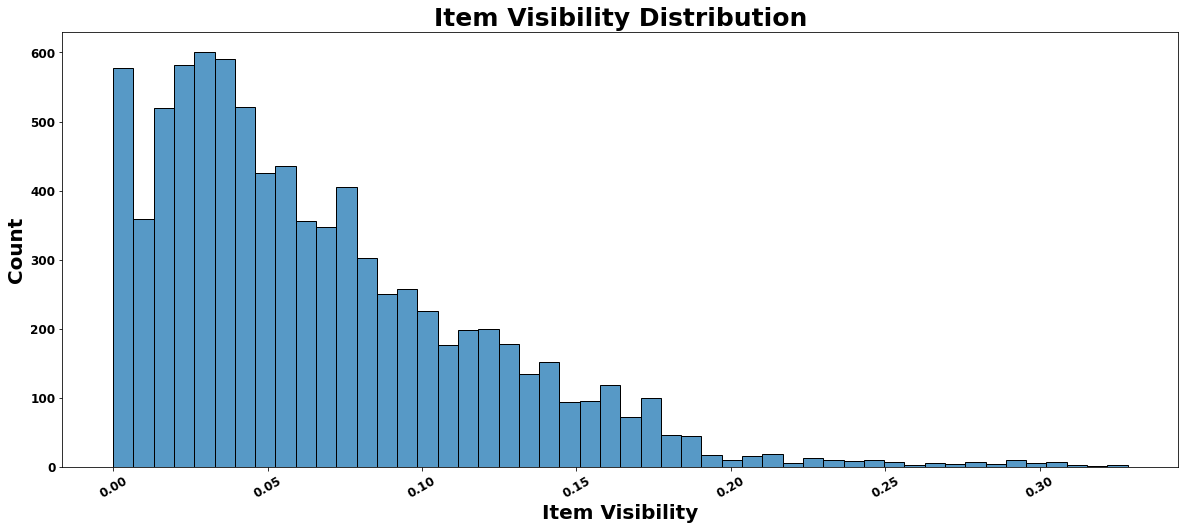

In [49]:
plt.figure(figsize = (20, 8))
#sns.set_style('whitegrid') #'darkgrid', 'whitegrid', 'dark, 'white', 'ticks'

sns.histplot(data=df, x='Item_Visibility'); 

plt.title('Item Visibility Distribution', fontsize = 25, weight='bold')
plt.xlabel('Item Visibility', fontsize = 20, weight='bold')
plt.ylabel('Count', fontsize = 20, weight='bold');
plt.xticks(fontsize = 12, weight='bold', rotation=30)
plt.yticks(fontsize = 12, weight='bold');

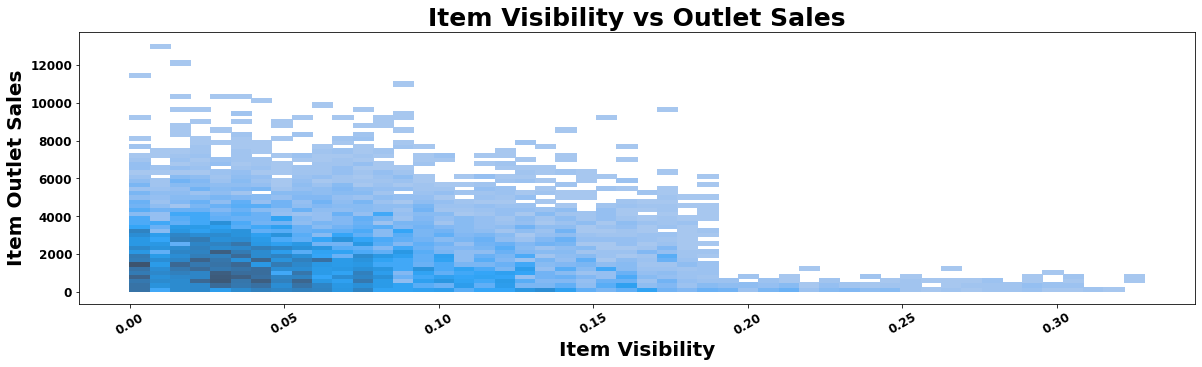

In [55]:
plt.figure(figsize = (20, 5))
#sns.set_style('whitegrid') #'darkgrid', 'whitegrid', 'dark, 'white', 'ticks'

sns.histplot(data=df, x='Item_Visibility',y='Item_Outlet_Sales')

plt.title('Item Visibility vs Outlet Sales', fontsize = 25, weight='bold')
plt.xlabel('Item Visibility', fontsize = 20, weight='bold')
plt.ylabel('Item Outlet Sales', fontsize = 20, weight='bold');
plt.xticks(fontsize = 12, weight='bold', rotation=30)
plt.yticks(fontsize = 12, weight='bold');

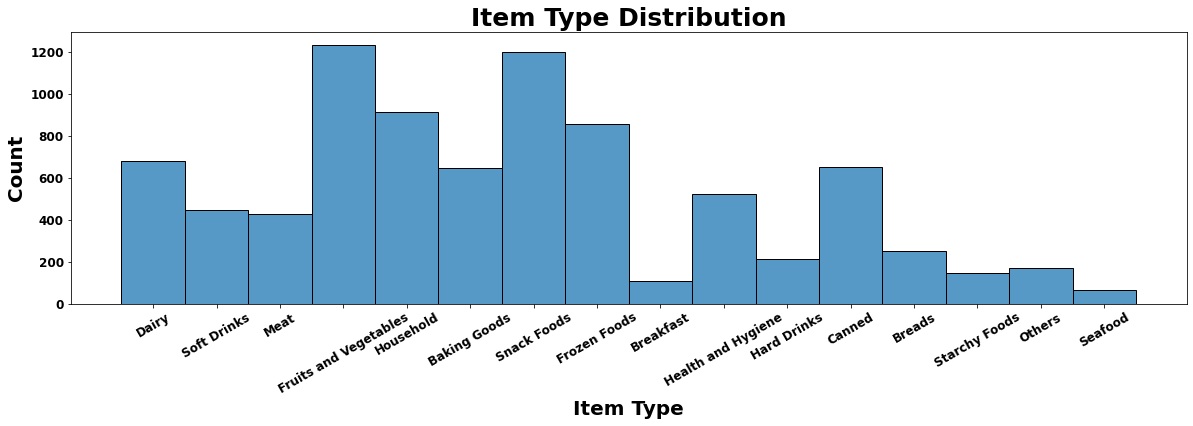

In [47]:
plt.figure(figsize = (20, 5))
#sns.set_style('whitegrid') #'darkgrid', 'whitegrid', 'dark, 'white', 'ticks'

sns.histplot(data=df, x='Item_Type'); 

plt.title('Item Type Distribution', fontsize = 25, weight='bold')
plt.xlabel('Item Type', fontsize = 20, weight='bold')
plt.ylabel('Count', fontsize = 20, weight='bold');
plt.xticks(fontsize = 12, weight='bold', rotation=30)
plt.yticks(fontsize = 12, weight='bold');

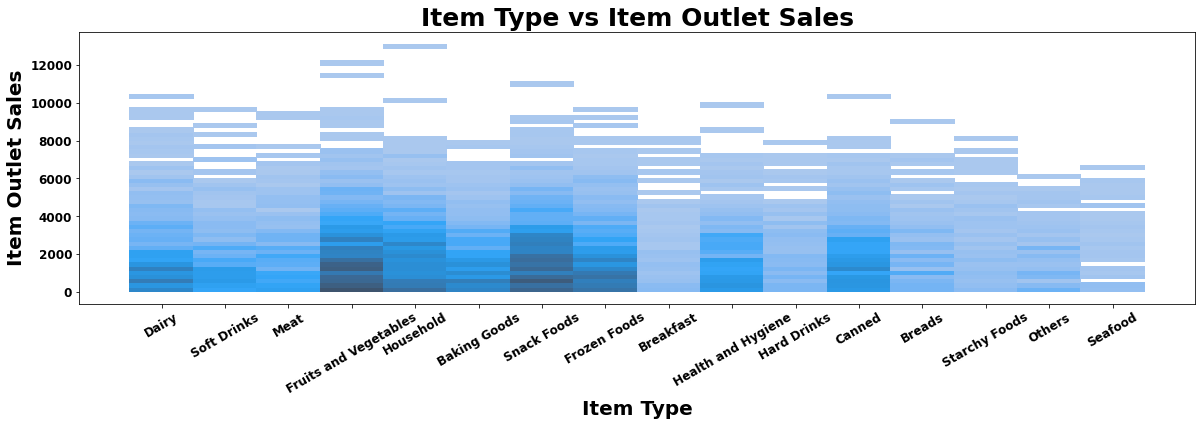

In [40]:
plt.figure(figsize = (20, 5))

sns.histplot(data=df, x='Item_Type', y='Item_Outlet_Sales'); 

plt.title('Item Type vs Item Outlet Sales', fontsize = 25, weight='bold')
plt.xlabel('Item Type', fontsize = 20, weight='bold')
plt.ylabel('Item Outlet Sales', fontsize = 20, weight='bold')
plt.xticks(fontsize = 12, weight='bold', rotation=30)
plt.yticks(fontsize = 12, weight='bold');

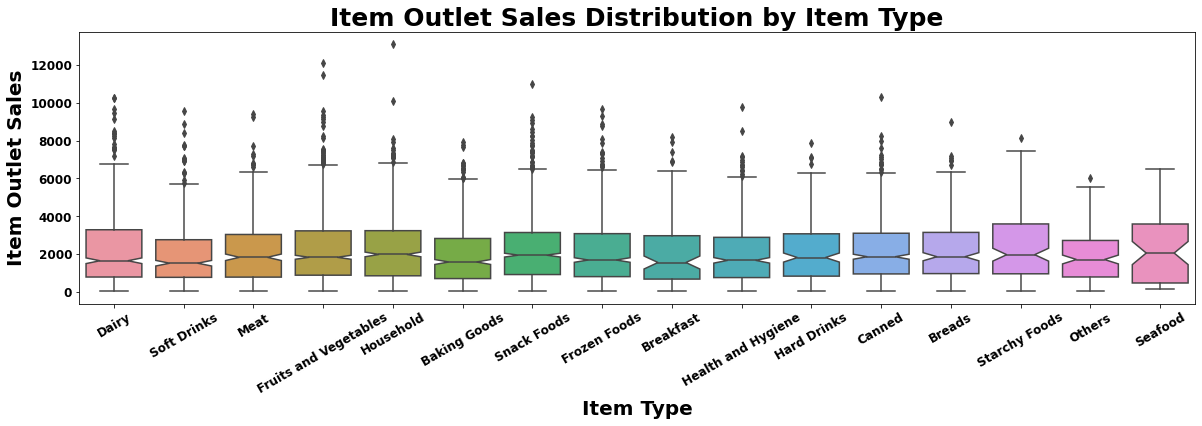

In [43]:
plt.figure(figsize = (20, 5))

sns.boxplot(data=df, x='Item_Type', y='Item_Outlet_Sales', notch=True)

plt.title('Item Outlet Sales Distribution by Item Type', fontsize = 25, weight='bold')
plt.xlabel('Item Type', fontsize = 20, weight='bold')
plt.ylabel('Item Outlet Sales', fontsize = 20, weight='bold')
plt.xticks(fontsize = 12, weight='bold', rotation=30)
plt.yticks(fontsize = 12, weight='bold');

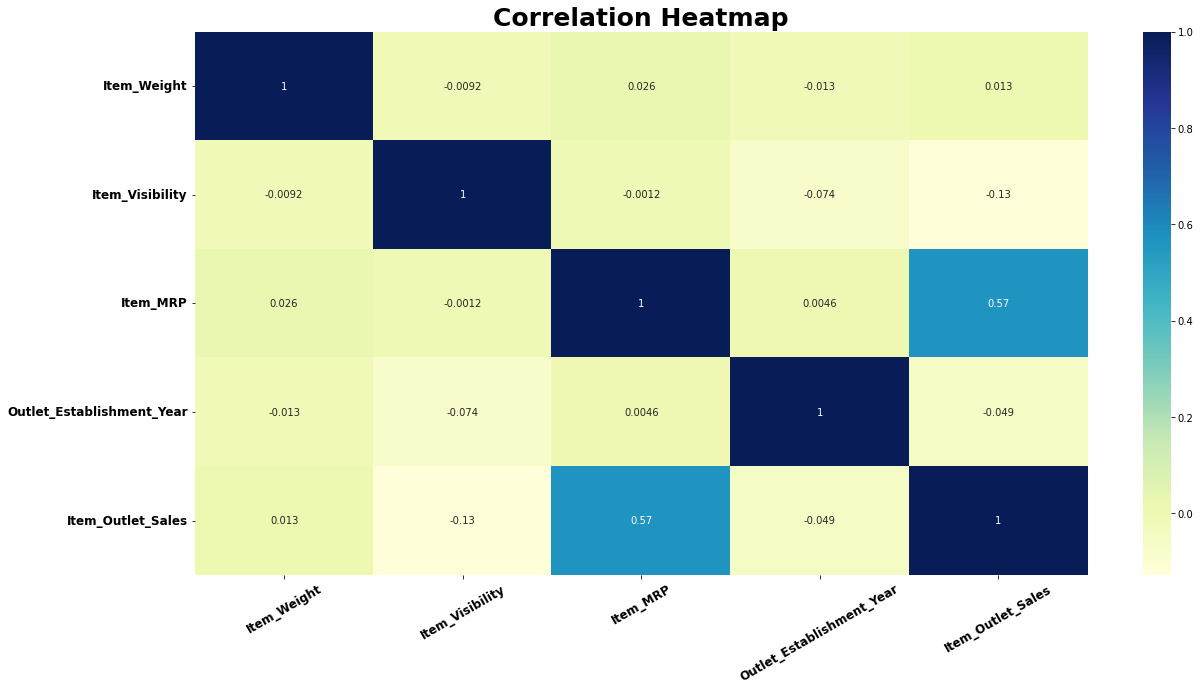

In [53]:
plt.figure(figsize = (20, 10))

corr = df.corr()
sns.heatmap(corr, cmap='YlGnBu', annot=True);

plt.title('Correlation Heatmap', fontsize = 25, weight='bold')

plt.xticks(fontsize = 12, weight='bold', rotation=30)
plt.yticks(fontsize = 12, weight='bold');



---

